# Glass Identification

**Project Description**

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

**Attribute Information-**

1 Id number: 1 to 214
2 RI: refractive index
3 Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4 Mg: Magnesium
5 Al: Aluminum
6 Si: Silicon
7 K: Potassium
8 Ca: Calcium
9 Ba: Barium
10 Fe: Iron
11 Type of glass: (class attribute)

•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass


**1. Importing required libaries**

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [22]:
data =  pd.read_csv('glass.csv', header = None)
data

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


**2. I have saved raw data into csv file from the Github link and imported into jupyter botebook for further processig.**

In [66]:
df = pd.DataFrame(data)
df

,ID,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Giving meaningful names to column headers.

In [24]:
df.columns = ['ID','RI','Na','Mg','AI','Si','K','Ca','Ba','Fe','Type']

In [25]:
df.head()  # First 5 rows

,ID,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [48]:
df.tail()  # last 5 rows

,ID,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


 # 3. EDA (Exploratory Data Analysis)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   AI      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [54]:
df.isnull().sum()

ID      0
RI      0
Na      0
Mg      0
AI      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

From above, we can see there are no null values present in the dataset

In [55]:
df.shape

(214, 11)

There are 214 rows and 11 columns are present in the dataset, where, columns 1 to 10 are independent columns and columns 11 which is type attribute is our dependent variable.

In [56]:
df.describe()

,ID,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.761682
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.123915
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Describe function helps us to understand mean, count, standard deviation, minimum, maximum and interquantile values of the datasets.
So we can see there is a gap between 75% and max values for the ID column.

In [57]:
df.skew()

ID      0.000000
RI      1.625431
Na      0.454181
Mg     -1.152559
AI      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.078734
dtype: float64

Testinf the data fro the skewness. From above, we can see that there is skewness present in the dataset. 

RI,Mg,K,Ca,Ba and Fe columns are outside the acceptable range (+/- 0.5). It suggests outliers are present in the dataset.

# 4. Visualisation

Text(0.5, 0, 'Glass Type')

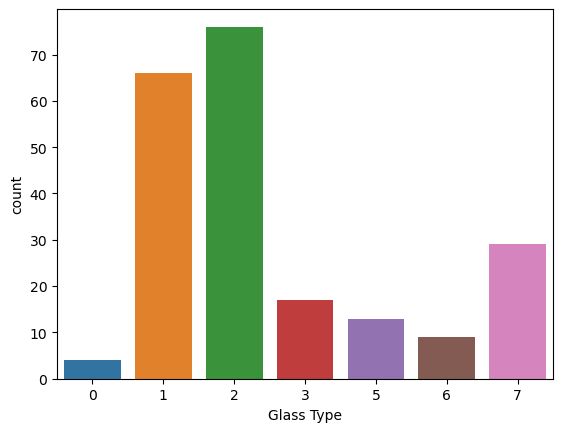

In [71]:
sns.countplot(x = 'Type', data = df)
plt.xlabel('Glass Type')

By looking at the countoplot above, we ca see that variaous types of glasses. However, type 1 and type are leading the chart. It suggest that there is imbalance in the dataset and we will need to rectify it so that our model doesn't get biased while predicting.

Its criminal investigation data, so class 1 and 2 are most common as ciminal most likely breaks building window glasses than other glass types. Hence, more occurance is present.

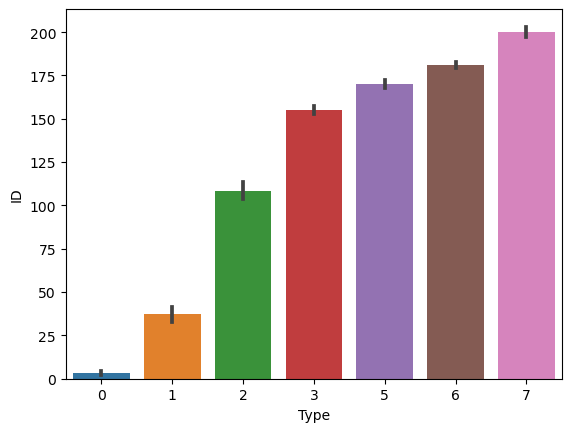

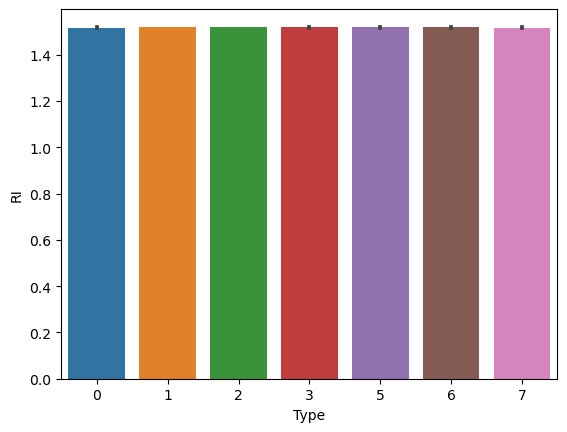

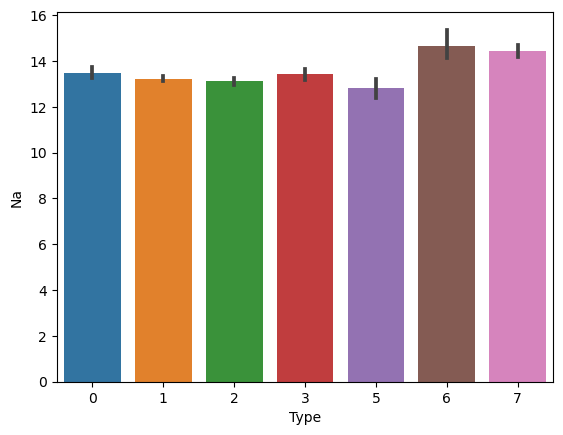

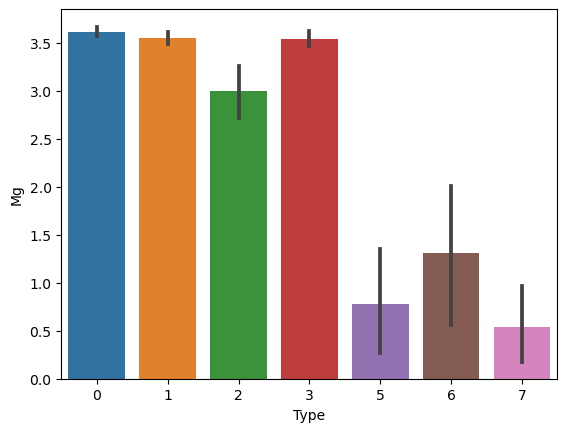

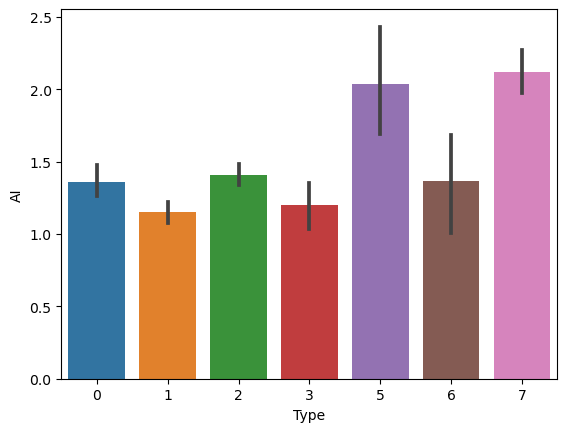

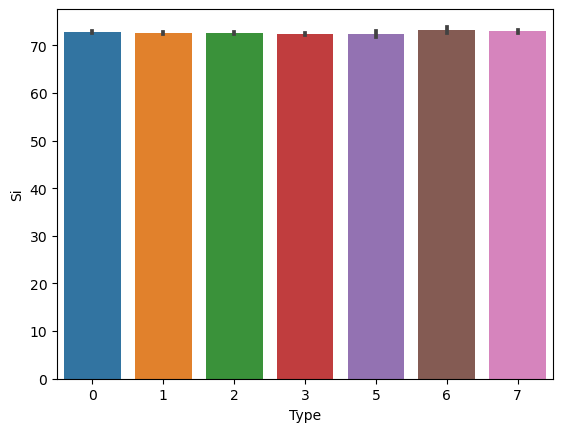

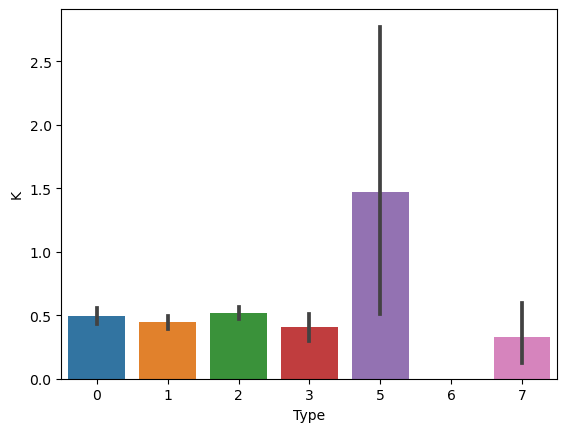

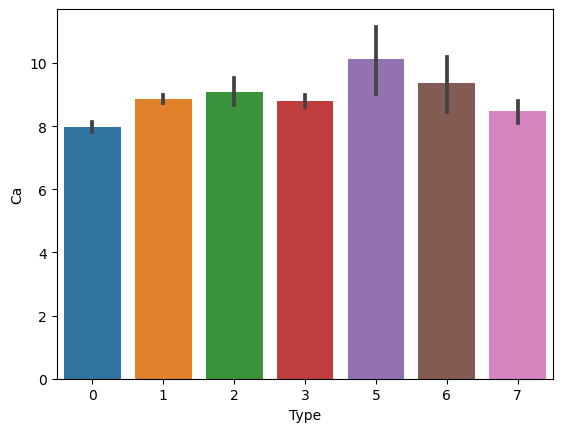

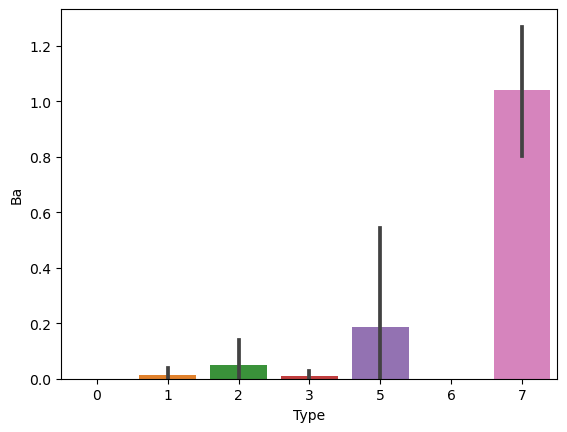

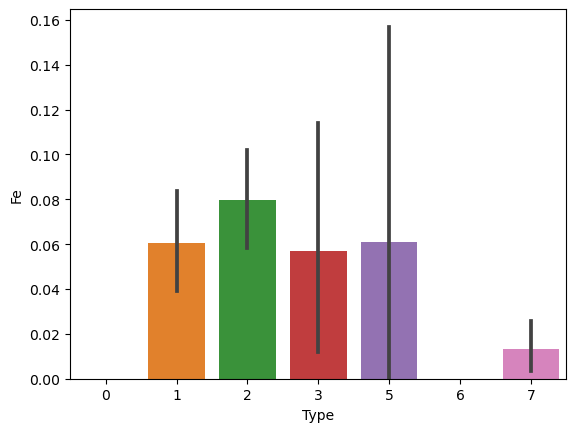

In [74]:
column = df.iloc[:,:-1]
index = 0

for i in column.items():
    sns.barplot(x = df['Type'], data = df, y = i[index])
    plt.show()

From above charts, we can see that chemical properties and measurement in terms of glass type.

Dataset is divided into window glass (glass type 1-4) and non-window glass (glasstype 1-7)

ID         Axes(0.125,0.712609;0.227941x0.167391)
RI      Axes(0.398529,0.712609;0.227941x0.167391)
Na      Axes(0.672059,0.712609;0.227941x0.167391)
Mg         Axes(0.125,0.511739;0.227941x0.167391)
AI      Axes(0.398529,0.511739;0.227941x0.167391)
Si      Axes(0.672059,0.511739;0.227941x0.167391)
K           Axes(0.125,0.31087;0.227941x0.167391)
Ca       Axes(0.398529,0.31087;0.227941x0.167391)
Ba       Axes(0.672059,0.31087;0.227941x0.167391)
Fe             Axes(0.125,0.11;0.227941x0.167391)
Type        Axes(0.398529,0.11;0.227941x0.167391)
dtype: object

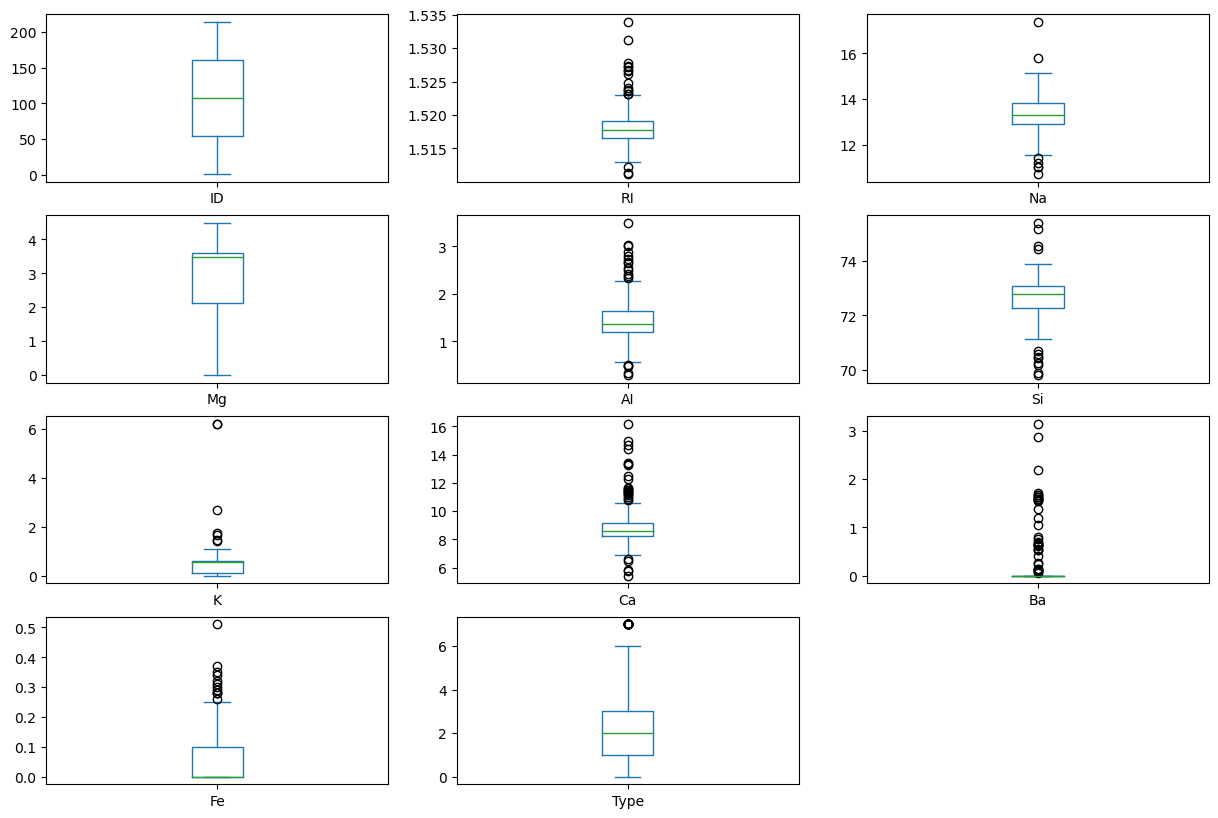

In [77]:
df.plot(kind = 'box', subplots = True, layout = (4,3), figsize = (15,10))

From above we can see that outliers are present in the dataset and we will need to remove it as required.

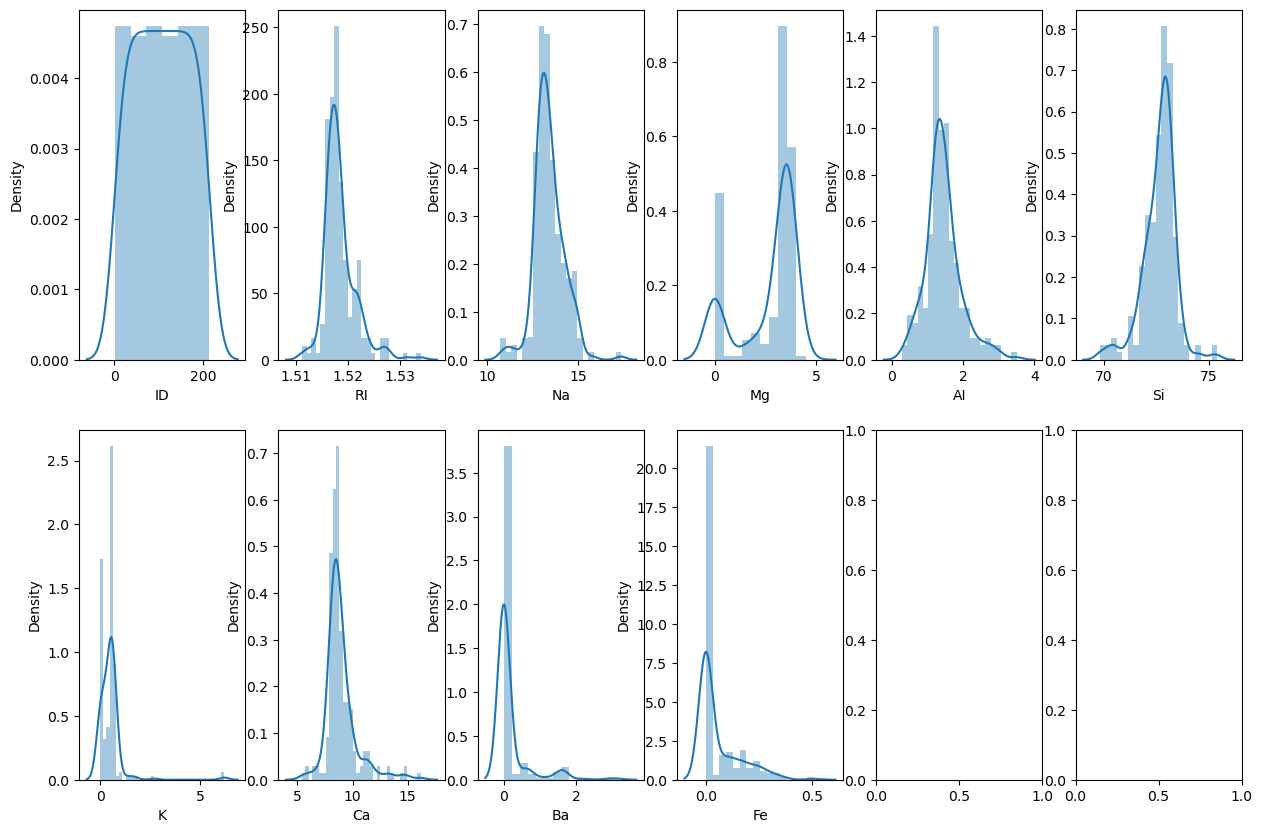

In [78]:
fig,ax = plt.subplots(ncols = 6, nrows=2, figsize=(15,10))
index = 0

ax = ax.flatten()
column = df.iloc[:,:-1]
for col, value in column.items():
    sns.distplot(value, ax = ax[index])
    index += 1
plt.show()

From above, we can see that most columns are normally distributed with proper bell shaped curve. However, few of the are either right skewed or left skewed.

We will remove ID columns a it is irrelevant for our prediction.

In [90]:
df.drop(['ID'], axis=1, inplace = True)

<Axes: >

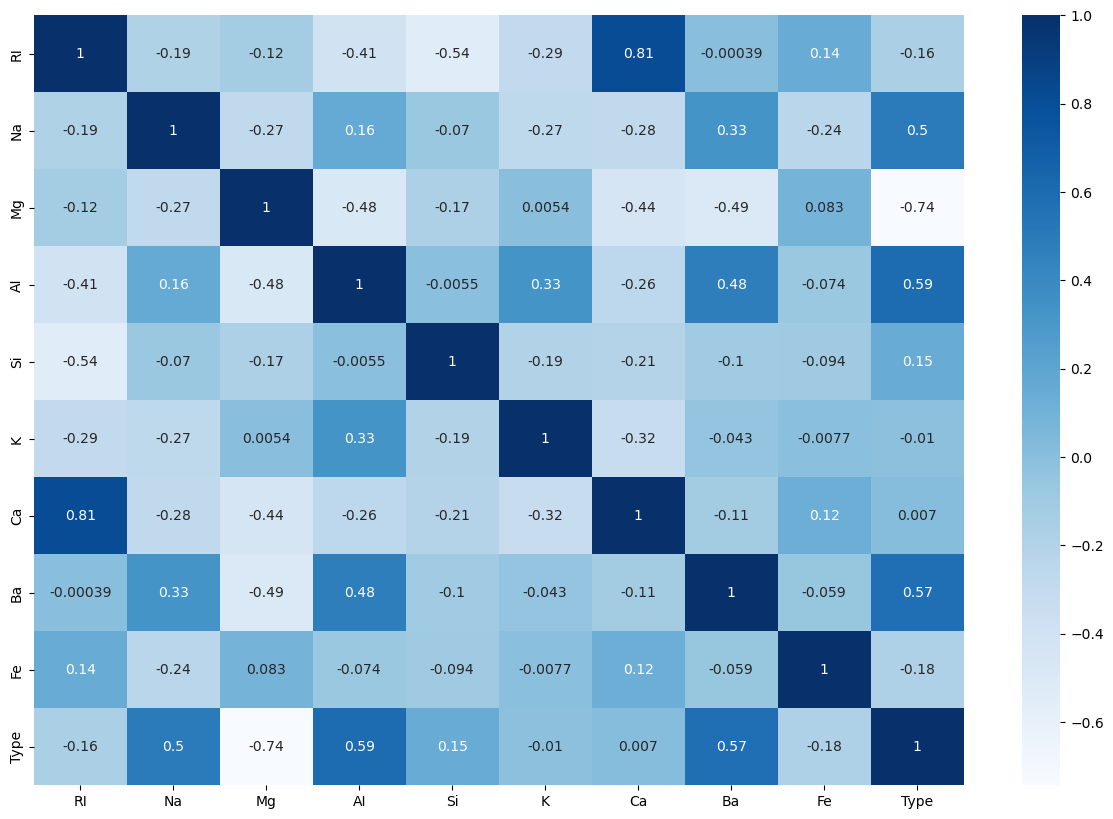

In [91]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')

From above heatmap, we can see +1 indicates positive correlation and -1 indicates negative correlation.

# 5. Removing outliers

In [94]:
z = np.abs(zscore(df))
z

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451,0.831395
1,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451,1.303328
2,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451,1.303328
3,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451,1.303328
4,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451,1.303328
...,...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451,2.000201
210,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451,2.000201
211,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451,2.000201
212,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451,2.000201


In [95]:
threshold = 3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [96]:
dfn = df[(z<3).all(axis=1)]
dfn

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [97]:
df.shape

(214, 10)

In [98]:
dfn.shape

(194, 10)

In [101]:
df = dfn

So we have 194 rows after removing outliers than the 214 rows we previously had.

Now we will split our datasets into training and testing datasets

In [161]:
x = df.iloc[:,:-1]
x

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0


In [186]:
y = df.iloc[:,-1]
y

0      1
1      0
2      0
3      0
4      0
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type, Length: 194, dtype: int64

Now the dataset is split into x and y variables, which represents independent and dependent variable respectively.

In [163]:
sc = StandardScaler()

In [164]:
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
x

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe
0,1.291781,0.332127,1.233397,-0.729105,-1.612464,-1.319609,-0.075653,-0.346292,-0.603056
1,-0.197832,0.704398,0.551581,-0.141722,0.016082,0.172091,-1.008147,-0.346292,-0.603056
2,-0.824346,0.168328,0.513277,0.264928,0.461790,-0.147559,-1.058826,-0.346292,-0.603056
3,-0.175926,-0.308179,0.620529,-0.299864,-0.189629,0.491741,-0.612851,-0.346292,-0.603056
4,-0.281075,-0.218834,0.566903,-0.412822,0.616073,0.420708,-0.764888,-0.346292,-0.603056
...,...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,-2.206325,2.975928,0.221793,-1.532708,0.633854,1.169695,-0.603056
190,-0.802440,1.076668,-2.206325,3.292211,-0.189629,-1.248575,0.360187,2.629534,-0.603056
191,-0.530805,2.238153,-2.206325,1.281553,0.581788,-1.532708,-0.430406,4.117447,-0.603056
192,1.134057,1.404267,-2.206325,1.349328,1.198921,-1.532708,-0.389863,4.257816,-0.603056


We have scaled the data using Stadard Scaler

we will transform target variable into binary form like 0 for window glass and 1 for non-window glass.

In [188]:
y1 = y.apply(lambda y:1 if y>=5 else 0)
y1.value_counts()

0    154
1     40
Name: Type, dtype: int64

In [194]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state = 42)

In [195]:
x_train.shape

(135, 9)

In [196]:
x_test.shape

(59, 9)

# 6. Using Machine Learning Model

In [215]:
lg = LogisticRegression()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
sv = SVC()

In [216]:
model = [lg, knc, dtc, rfc,sv ]

In [217]:
def modelselec():
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        
        pred = m.predict(x_test)
        print('Model:', m)
        acc_score = (accuracy_score(y_test, pred))*100
        print('Accuracy Score:', accuracy_score(pred,y_test))
        print('Confusion Matrix:', confusion_matrix(y_test, pred))
        print('Classification Report:', classification_report(y_test, pred))
        
        # Cross Validation Score
        cross_score = (cross_val_score(m, x, y, cv=5).mean())*100
        print("Cross Validation Score:", cross_score)
    
        result = acc_score - cross_score
        print("\nAccuracy Score - Cross Validation Score is", result)
        print('-------------------------------------------------------------')
        
        

In [218]:
modelselec()

Model: LogisticRegression()
Accuracy Score: 0.6949152542372882
Confusion Matrix: [[ 0  0  0  0  0  0  0]
 [ 0 12  6  3  0  0  0]
 [ 0  4 19  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 1  0  1  0  0  3  0]
 [ 0  0  0  0  0  0  4]]
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.63      0.57      0.60        21
           2       0.73      0.83      0.78        23
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         3
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         4

    accuracy                           0.69        59
   macro avg       0.62      0.57      0.59        59
weighted avg       0.71      0.69      0.70        59

Cross Validation Score: 64.45344129554655

Accuracy Score - Cross Validation Score is 5.038084128182263
--------------------------

# 7. Hyperparameter tuning


In [222]:
from sklearn.model_selection import GridSearchCV

In [232]:
grid_param = {'criterion':['gini','entropy']}

gd_sr = GridSearchCV(estimator = rfc, param_grid = grid_param, scoring = 'accuracy', cv=5)

gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(gd_sr.best_score_)
print(best_parameters)

0.7117408906882592
{'criterion': 'entropy'}


In [233]:
rfc = RandomForestClassifier(criterion = 'entropy')
rfc.fit(x,y)
rfc.score(x,y)

1.0

Random Forest Classifier is our best model with the highest accuracy score.